## Analysis of sales patterns, popular dishes, and inventory usage

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
# reading the cleaned Orders dataset
orders = pd.read_pickle('../data/cleaned/orders_cleaned.pkl')
orders.head()

,order_id,customer_name,restaurant_id,order_date,quantity_of_items,order_amount,payment_mode,delivery_time_taken_(mins),customer_rating_food,customer_rating_delivery,day,hour,weekday,month,is_weekend
0,OD1,srini,6,2022-01-01 23:15:00,5,633,debit_card,47,5,3,2022-01-01,23,5,1,weekend
1,OD2,revandh,13,2022-01-01 19:21:00,5,258,credit_card,41,3,5,2022-01-01,19,5,1,weekend
2,OD3,david,9,2022-01-01 23:15:00,7,594,cash_on_delivery,30,3,4,2022-01-01,23,5,1,weekend
3,OD4,selva,4,2022-01-01 20:31:00,5,868,cash_on_delivery,30,3,4,2022-01-01,20,5,1,weekend
4,OD5,vinny,4,2022-01-01 11:10:00,4,170,debit_card,18,4,3,2022-01-01,11,5,1,weekend


In [7]:
# reading the cleaned Restaurants dataset
restaurants = pd.read_pickle('../data/cleaned/restaurants_cleaned.pkl')
restaurants.head()

,restaurant_id,restaurant_name,cuisine,zone,category
0,1,the_cave_hotel,continental,zone_b,pro
1,2,ssk_hotel,north_indian,zone_d,pro
2,3,asr_restaurant,south_indian,zone_d,ordinary
3,4,win_hotel,south_indian,zone_d,ordinary
4,5,denver_restaurant,continental,zone_d,pro


### Merge the two dataset

In [9]:
df = orders.merge(restaurants, on='restaurant_id')

# Storing the combined data
df.to_pickle('../data/cleaned/combined.pkl')

df.head()

,order_id,customer_name,restaurant_id,order_date,quantity_of_items,order_amount,payment_mode,delivery_time_taken_(mins),customer_rating_food,customer_rating_delivery,day,hour,weekday,month,is_weekend,restaurant_name,cuisine,zone,category
0,OD1,srini,6,2022-01-01 23:15:00,5,633,debit_card,47,5,3,2022-01-01,23,5,1,weekend,willies,french,zone_d,pro
1,OD2,revandh,13,2022-01-01 19:21:00,5,258,credit_card,41,3,5,2022-01-01,19,5,1,weekend,veer_restaurant,chinese,zone_d,ordinary
2,OD3,david,9,2022-01-01 23:15:00,7,594,cash_on_delivery,30,3,4,2022-01-01,23,5,1,weekend,excel_restaurant,north_indian,zone_d,ordinary
3,OD4,selva,4,2022-01-01 20:31:00,5,868,cash_on_delivery,30,3,4,2022-01-01,20,5,1,weekend,win_hotel,south_indian,zone_d,ordinary
4,OD5,vinny,4,2022-01-01 11:10:00,4,170,debit_card,18,4,3,2022-01-01,11,5,1,weekend,win_hotel,south_indian,zone_d,ordinary


In [10]:
# which restaurants sell which type of cuisine
grouped_cuisines = df.groupby('restaurant_name')['cuisine'].unique().reset_index()

grouped_cuisines['cuisine'] = grouped_cuisines['cuisine'].apply(lambda x: ', '.join(sorted(set(x))))

print(grouped_cuisines.to_string(index=False))

  restaurant_name      cuisine
              amn north_indian
 anand_restaurant      african
   asr_restaurant south_indian
  chew_restaurant      belgian
       dave_hotel south_indian
denver_restaurant  continental
           ellora      african
 excel_restaurant north_indian
        ksr_hotel      chinese
             oslo       french
            ruchi      chinese
        sam_hotel      belgian
        ssk_hotel north_indian
   the_cave_hotel  continental
        the_taste       french
  veer_restaurant      chinese
    vrinda_bhavan north_indian
          willies       french
        win_hotel south_indian
          zam_zam      arabian


### Sales Analysis
- Overall Sales Insights
- Sales By Cuisine
- Sales By Hours
- Sales By Quantity of Items
- Sales By Payment Method
- Sales By Restaurants
- Sales By Customers
- Sales By Zone
- Sales By Category
- Sales By Customer Rating Food

In [11]:
# --- OVERALL SALES INSIGHTS ---

total_orders = len(df)
total_sales = df['order_amount'].sum()
average_order_value = df['order_amount'].mean()
average_items_per_order = df['quantity_of_items'].mean()
average_delivery_time = df['delivery_time_taken_(mins)'].mean()

# Average ratings
average_food_rating = df['customer_rating_food'].mean()
average_delivery_rating = df['customer_rating_delivery'].mean()

# Payment mode distribution
payment_distribution = df['payment_mode'].value_counts()

# Print results
print("OVERALL SALES INSIGHT")
print("----------------------------")
print(f"Total Orders: {total_orders}")
print(f"Total Sales Amount: ₹{total_sales:.2f}")
print(f"Average Order Value: ₹{average_order_value:.2f}")
print(f"Average Items per Order: {average_items_per_order:.2f}")
print(f"Average Delivery Time: {average_delivery_time:.2f} minutes")
print(f"Average Food Rating: {average_food_rating:.2f} / 5")
print(f"Average Delivery Rating: {average_delivery_rating:.2f} / 5")
print("\nPayment Mode Distribution:")
print(payment_distribution)

OVERALL SALES INSIGHT
----------------------------
Total Orders: 500
Total Sales Amount: ₹299071.00
Average Order Value: ₹598.14
Average Items per Order: 4.65
Average Delivery Time: 30.54 minutes
Average Food Rating: 3.36 / 5
Average Delivery Rating: 2.99 / 5

Payment Mode Distribution:
payment_mode
debit_card          174
cash_on_delivery    169
credit_card         157
Name: count, dtype: int64


### Sales By Cuisine

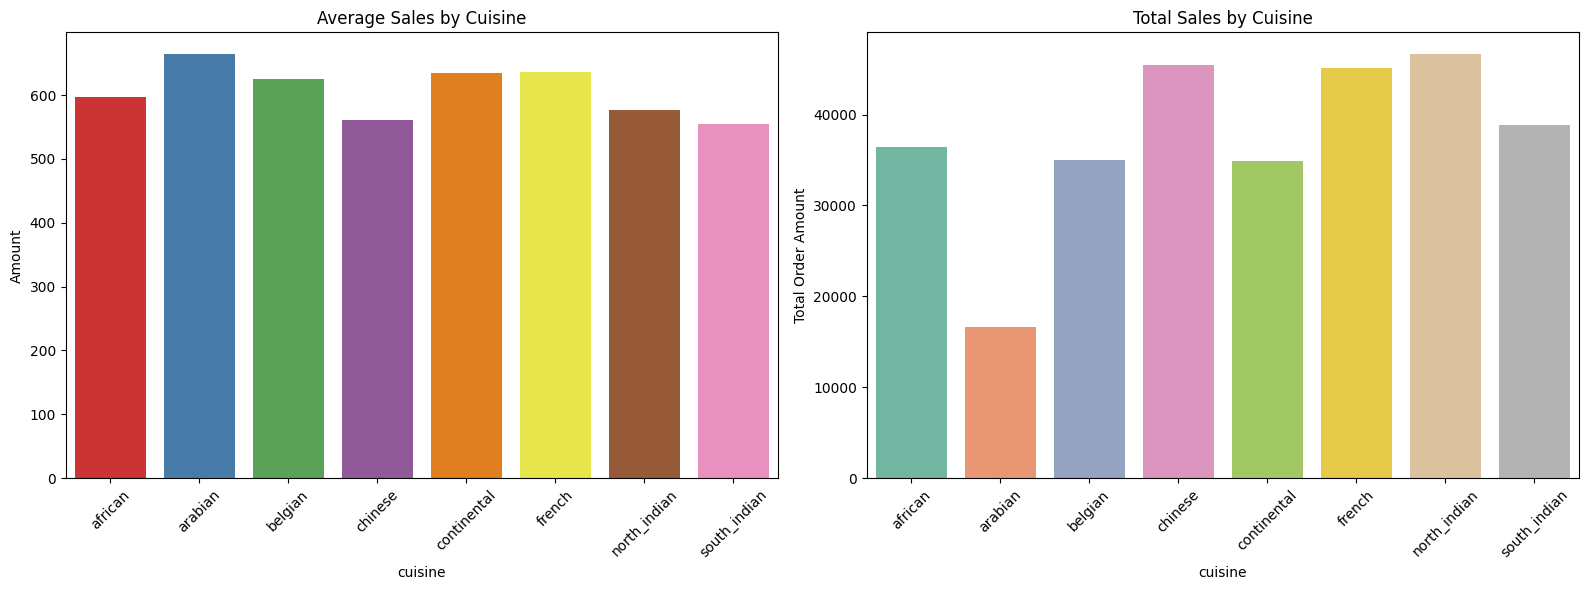

In [12]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Average Sales by cuisine
sns.barplot(data=df, x='cuisine', y='order_amount', estimator='mean', ci=None, ax=axes[0], palette='Set1')
axes[0].set_title('Average Sales by Cuisine')
axes[0].set_ylabel('Amount')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Total Sales by cuisine
sns.barplot(data=df, x='cuisine', y='order_amount', estimator='sum', ci=None, ax=axes[1], palette='Set2')
axes[1].set_title('Total Sales by Cuisine')
axes[1].set_ylabel('Total Order Amount')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

- Sales By Weekends and Weekdays can also be a possible sales pattern we should analyse but due to only a single day order present in the dataset, this becomes irrelevant

### Sales by Hour

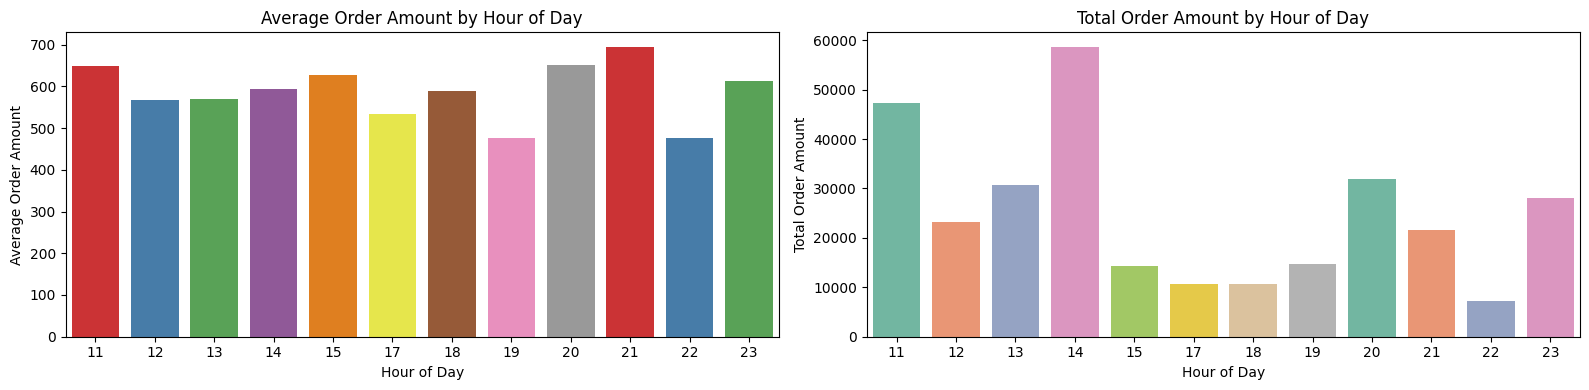

In [13]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Average Order Amount by Hour
sns.barplot(data=df, x='hour', y='order_amount', estimator='mean', ci=None, ax=axes[0], palette='Set1')
axes[0].set_title('Average Order Amount by Hour of Day')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average Order Amount')

# Total Order Amount by Hour
sns.barplot(data=df, x='hour', y='order_amount', estimator='sum', ci=None, ax=axes[1], palette='Set2')
axes[1].set_title('Total Order Amount by Hour of Day')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Total Order Amount')

plt.tight_layout()
plt.show()

### Sales by Quantity of Items

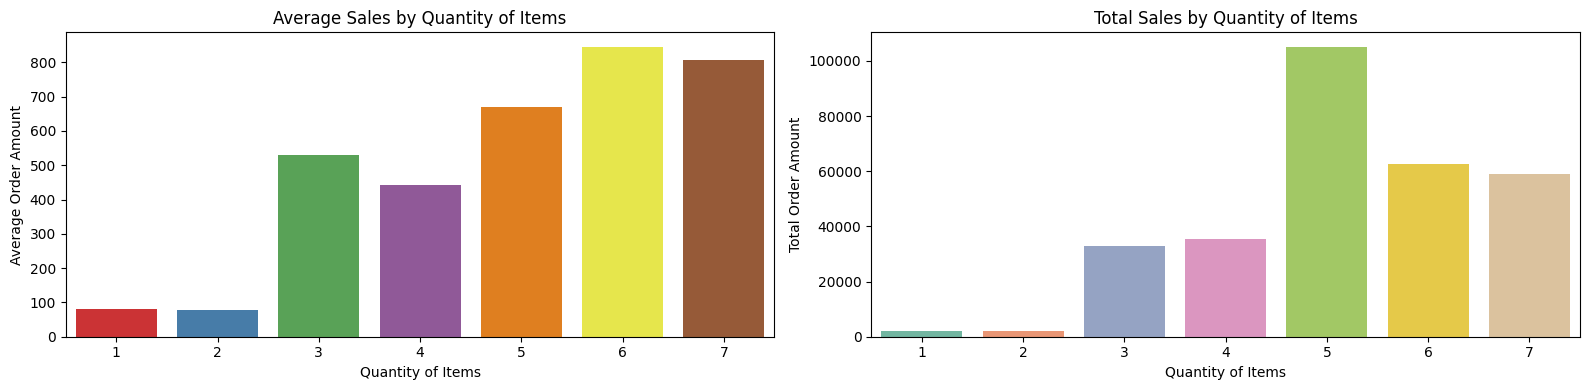

In [14]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Average Order Amount by Quantity of Items
sns.barplot(data=df, x='quantity_of_items', y='order_amount', estimator='mean', ci=None, ax=axes[0], palette='Set1')
axes[0].set_title('Average Sales by Quantity of Items')
axes[0].set_xlabel('Quantity of Items')
axes[0].set_ylabel('Average Order Amount')

# Total Order Amount by Quantity of Items
sns.barplot(data=df, x='quantity_of_items', y='order_amount', estimator='sum', ci=None, ax=axes[1], palette='Set2')
axes[1].set_title('Total Sales by Quantity of Items')
axes[1].set_xlabel('Quantity of Items')
axes[1].set_ylabel('Total Order Amount')

plt.tight_layout()
plt.show()

### Sales by Payment Method

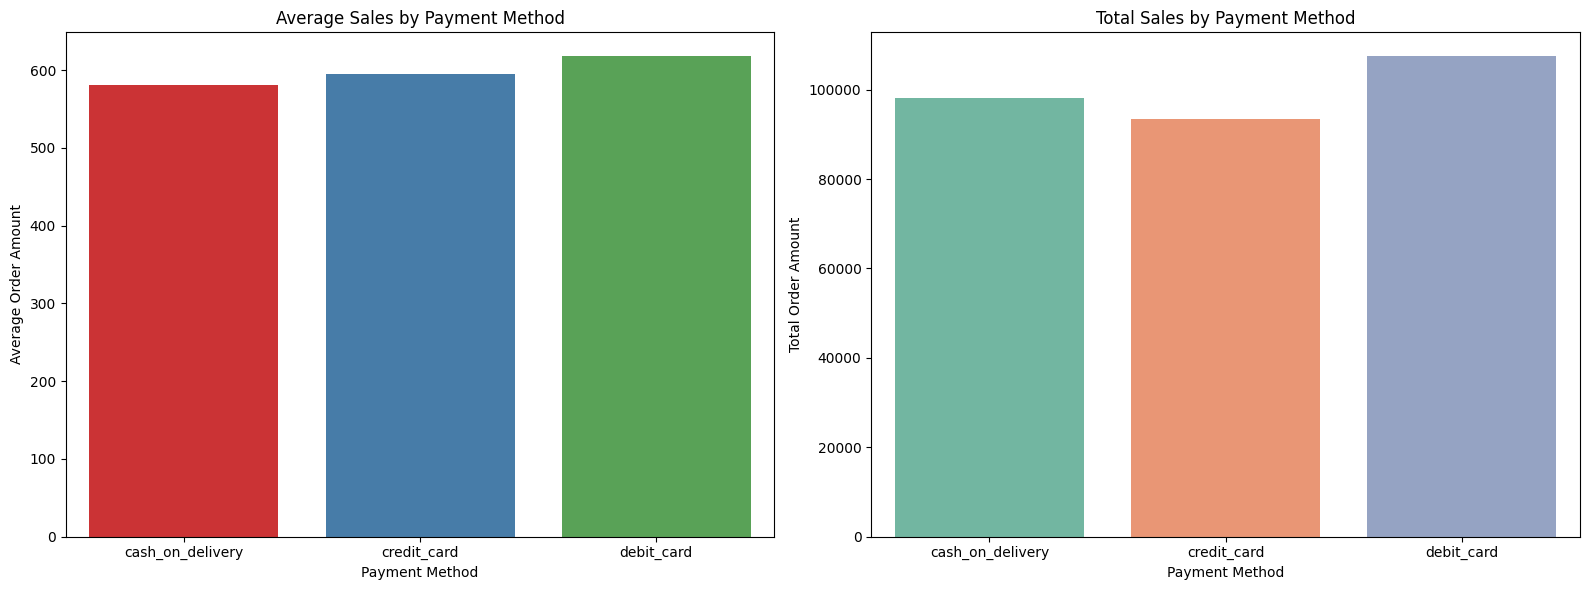

In [15]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Average Order Amount by Payment Method
sns.barplot(data=df, x='payment_mode', y='order_amount', estimator='mean', ci=None, ax=axes[0], palette='Set1')
axes[0].set_title('Average Sales by Payment Method')
axes[0].set_xlabel('Payment Method')
axes[0].set_ylabel('Average Order Amount')

# Total Order Amount by Payment Method
sns.barplot(data=df, x='payment_mode', y='order_amount', estimator='sum', ci=None, ax=axes[1], palette='Set2')
axes[1].set_title('Total Sales by Payment Method')
axes[1].set_xlabel('Payment Method')
axes[1].set_ylabel('Total Order Amount')

plt.tight_layout()
plt.show()

### Sales by Restaurants


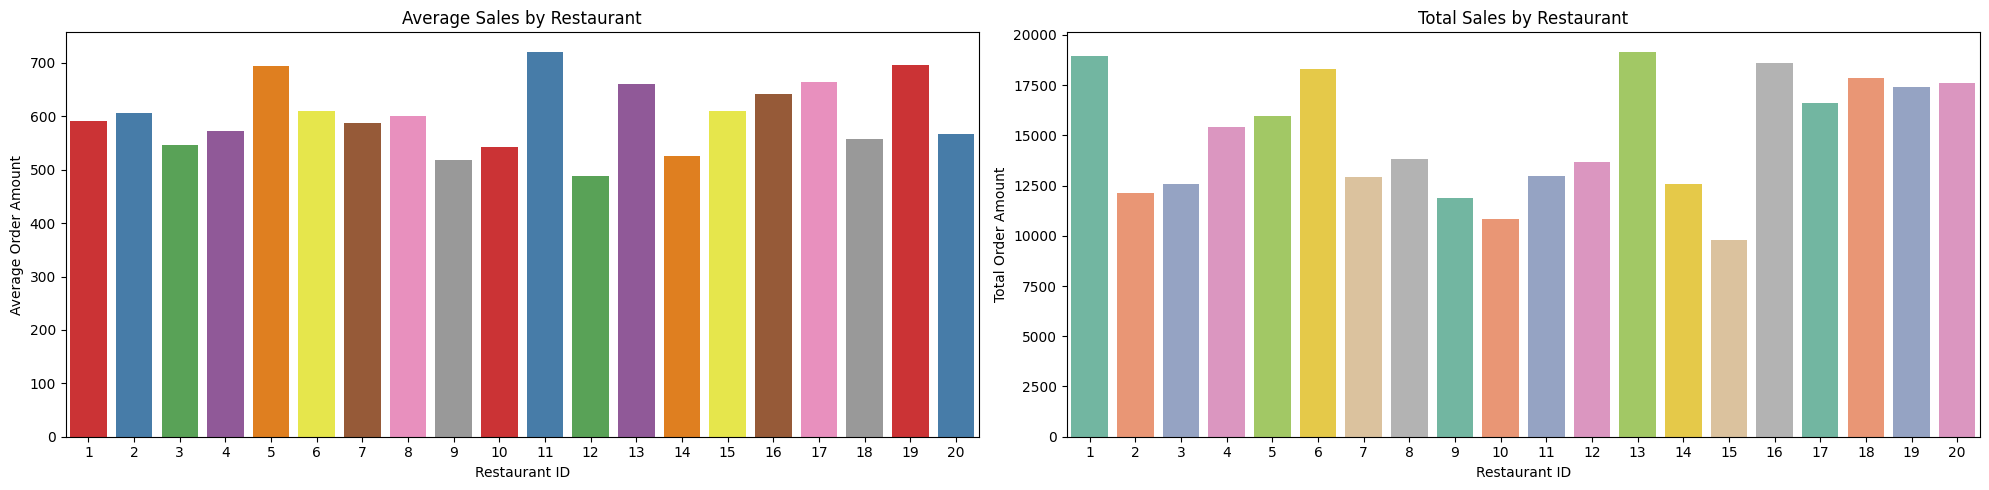

In [16]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Average Order Amount by Restaurant
sns.barplot(data=df, x='restaurant_id', y='order_amount', estimator='mean', ci=None, ax=axes[0], palette='Set1')
axes[0].set_title('Average Sales by Restaurant')
axes[0].set_xlabel('Restaurant ID')
axes[0].set_ylabel('Average Order Amount')

# Total Order Amount by Restaurant
sns.barplot(data=df, x='restaurant_id', y='order_amount', estimator='sum', ci=None, ax=axes[1], palette='Set2')
axes[1].set_title('Total Sales by Restaurant')
axes[1].set_xlabel('Restaurant ID')
axes[1].set_ylabel('Total Order Amount')

plt.tight_layout()
plt.show()

### Sales by Customers

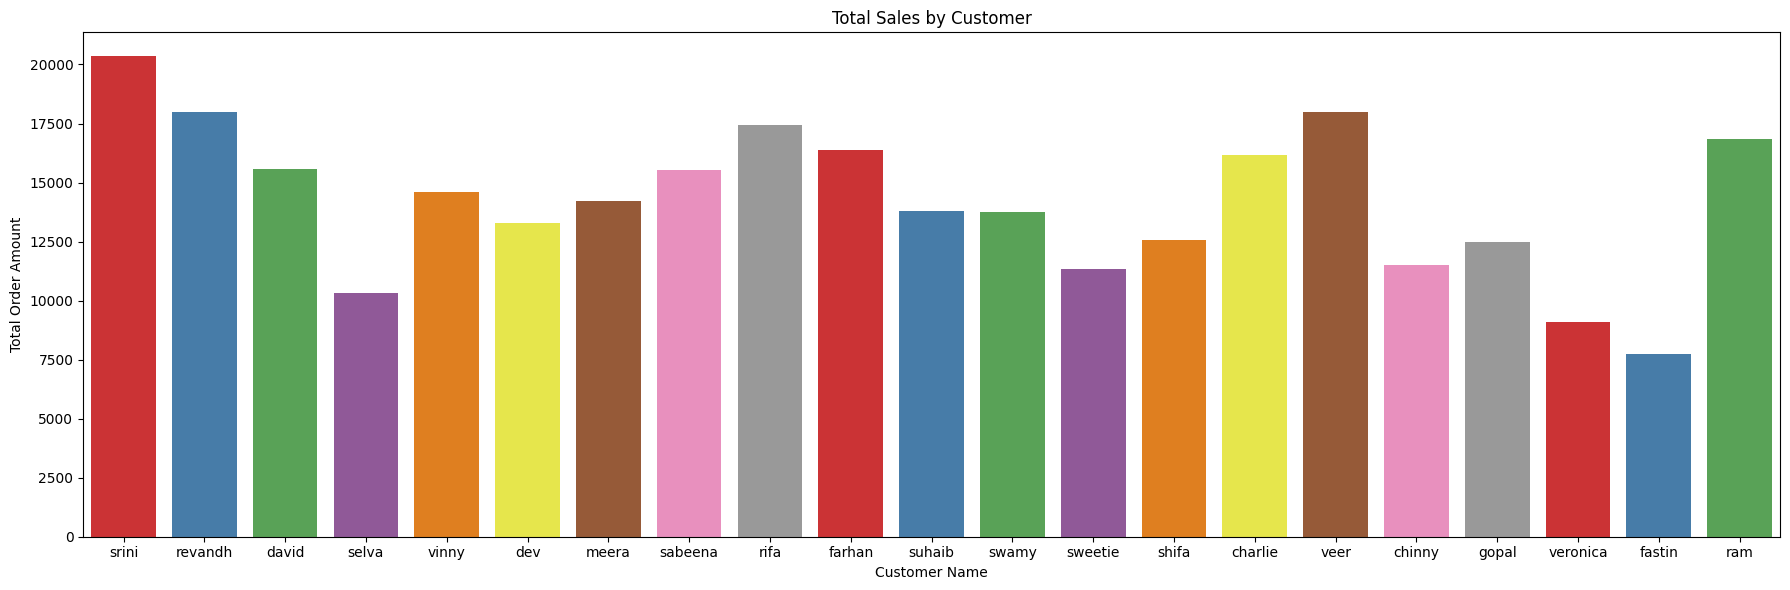

In [17]:
# Create subplots
plt.figure(figsize=(18, 6))

# Total Order Amount by Customer Name
sns.barplot(data=df, x='customer_name', y='order_amount', estimator='sum', ci=None, palette='Set1')
plt.title('Total Sales by Customer')
plt.xlabel('Customer Name')
plt.ylabel('Total Order Amount')

plt.tight_layout()
plt.show()


### Sales by Zone

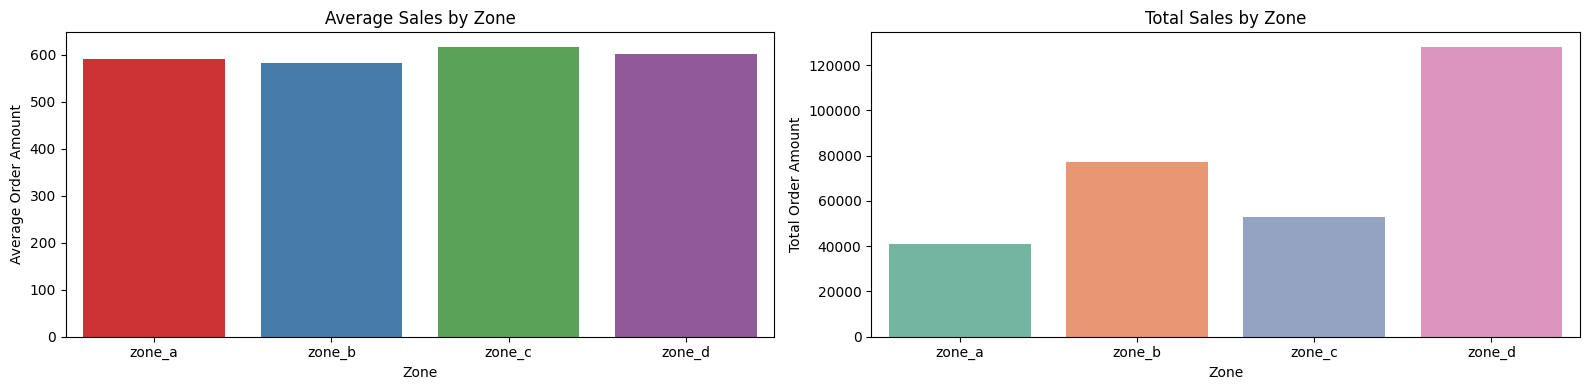

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Average Order Amount by Zone
sns.barplot(data=df, x='zone', y='order_amount', estimator='mean', ci=None, ax=axes[0], palette='Set1')
axes[0].set_title('Average Sales by Zone')
axes[0].set_xlabel('Zone')
axes[0].set_ylabel('Average Order Amount')

# Total Order Amount by Zone
sns.barplot(data=df, x='zone', y='order_amount', estimator='sum', ci=None, ax=axes[1], palette='Set2')
axes[1].set_title('Total Sales by Zone')
axes[1].set_xlabel('Zone')
axes[1].set_ylabel('Total Order Amount')

plt.tight_layout()
plt.show()

### Sales by Category

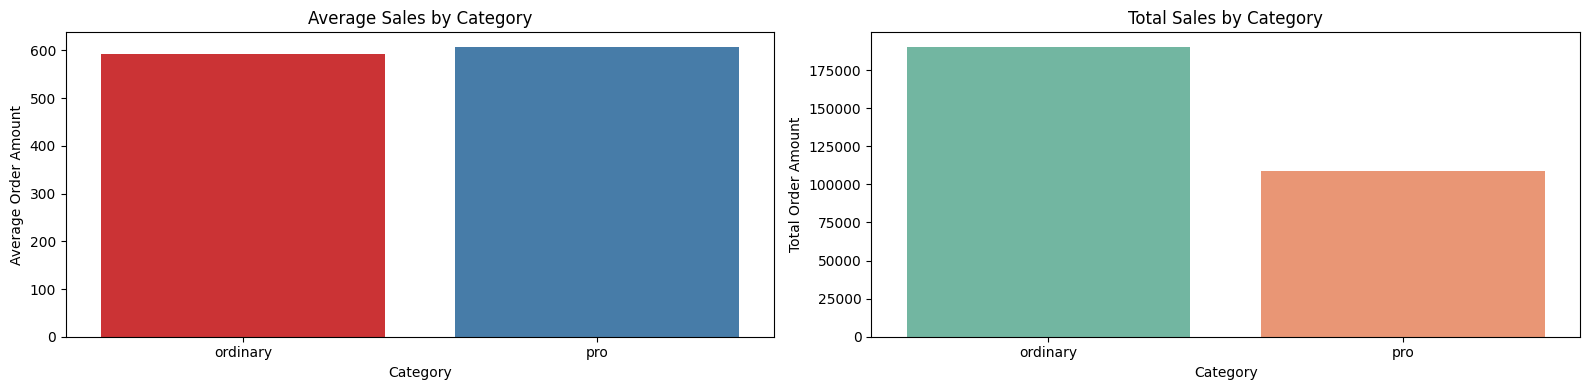

In [19]:
# Sales by Category
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Average Order Amount by Category
sns.barplot(data=df, x='category', y='order_amount', estimator='mean', ci=None, ax=axes[0], palette='Set1')
axes[0].set_title('Average Sales by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Average Order Amount')

# Total Order Amount by Category
sns.barplot(data=df, x='category', y='order_amount', estimator='sum', ci=None, ax=axes[1], palette='Set2')
axes[1].set_title('Total Sales by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Total Order Amount')

plt.tight_layout()
plt.show()

### Sales by Customer Rating Food

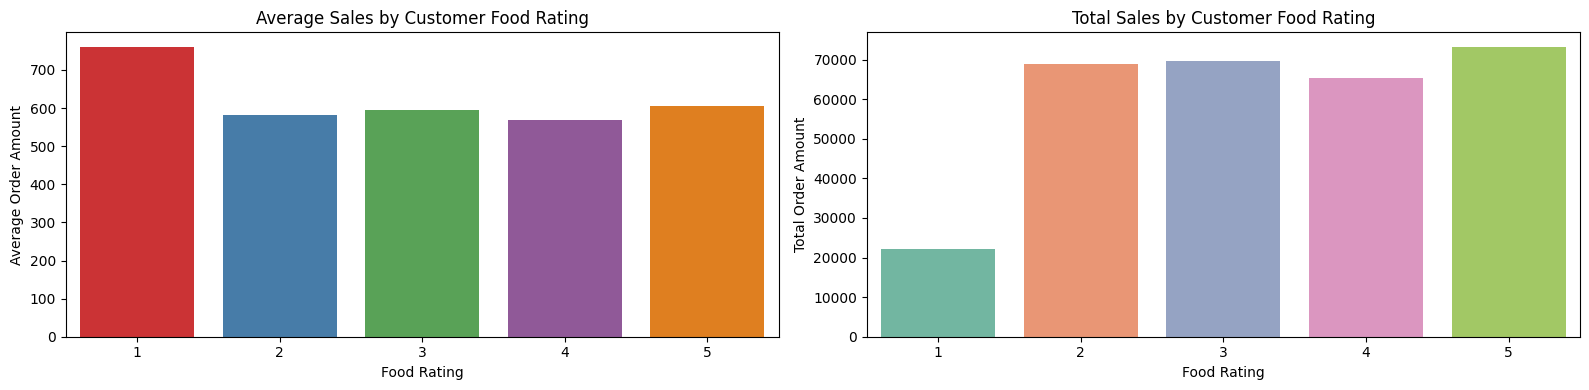

In [20]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Average Order Amount by Customer Food Rating
sns.barplot(data=df, x='customer_rating_food', y='order_amount', estimator='mean', ci=None, ax=axes[0], palette='Set1')
axes[0].set_title('Average Sales by Customer Food Rating')
axes[0].set_xlabel('Food Rating')
axes[0].set_ylabel('Average Order Amount')
    
# Total Order Amount by Customer Food Rating
sns.barplot(data=df, x='customer_rating_food', y='order_amount', estimator='sum', ci=None, ax=axes[1], palette='Set2')
axes[1].set_title('Total Sales by Customer Food Rating')
axes[1].set_xlabel('Food Rating')
axes[1].set_ylabel('Total Order Amount')

plt.tight_layout()
plt.show()

## Popular Dishes
- We can identify them by co-relating customer_rating_food and cuisine
- We can identify them by co-relating quantity_of_items and cuisine

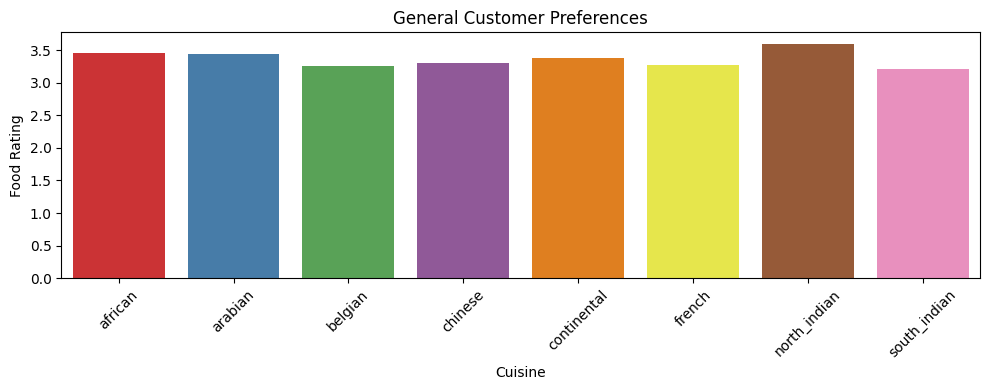

In [21]:
# Popular dishes based on Customer Food Rating
plt.figure(figsize=(10,4))

# Average Customer preferences
sns.barplot(data=df, x='cuisine', y='customer_rating_food', estimator='mean', ci=None, palette='Set1')
plt.title('General Customer Preferences')
plt.ylabel('Food Rating')
plt.xlabel('Cuisine')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

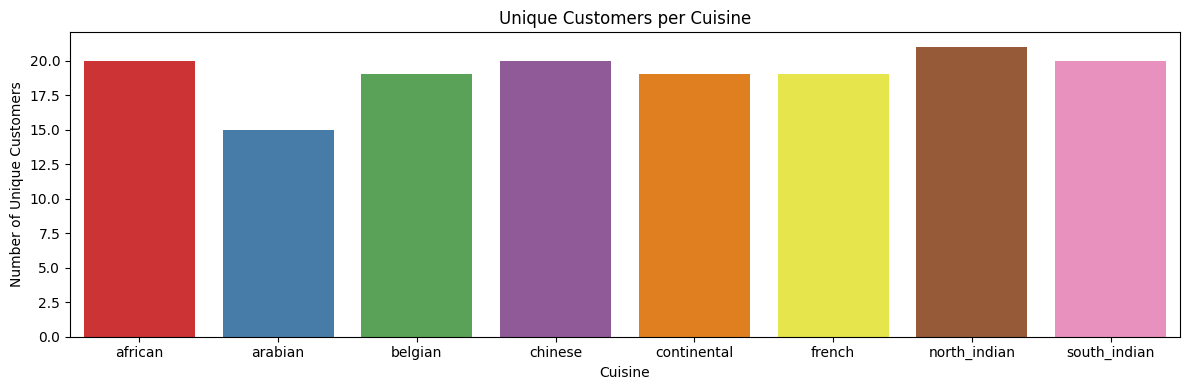

In [22]:
# Group by cuisine and count unique customers
unique_customers = df.groupby('cuisine')['customer_name'].nunique().reset_index()
unique_customers = unique_customers.sort_values(by='customer_name', ascending=False)

# Plot using Seaborn
plt.figure(figsize=(12, 4))
sns.barplot(data=unique_customers, x='cuisine', y='customer_name', palette='Set1')

# Labels and title
plt.ylabel('Number of Unique Customers')
plt.xlabel('Cuisine')
plt.title('Unique Customers per Cuisine')
plt.tight_layout()
plt.show()

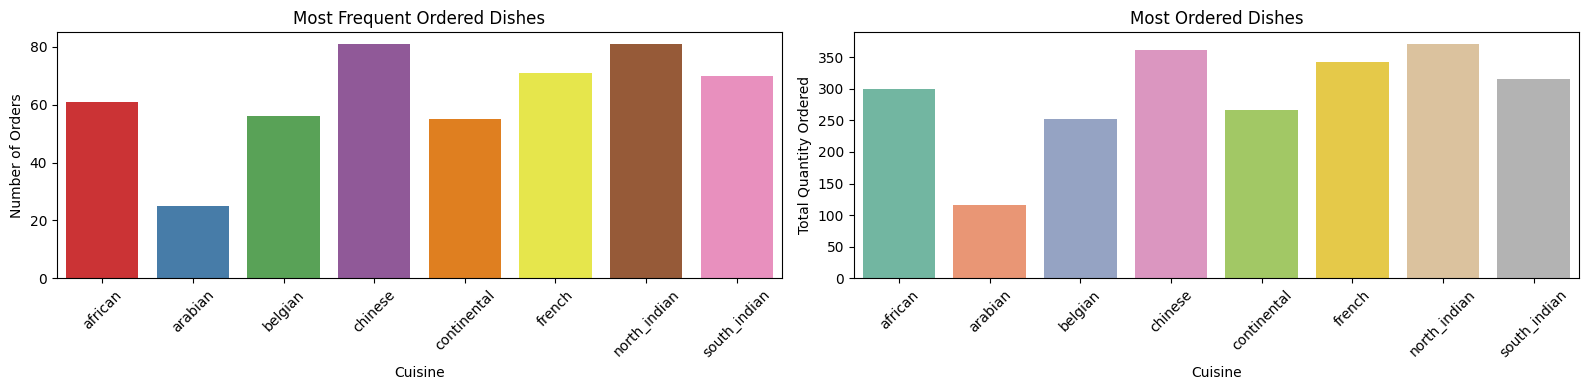

In [23]:
# Popular dishes based on Quantity
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Most Frequent Ordered Dishes
cuisine_counts = df['cuisine'].value_counts()

sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values, ci=None, ax=axes[0], palette='Set1')
axes[0].set_title('Most Frequent Ordered Dishes')
axes[0].set_xlabel('Cuisine')
axes[0].set_ylabel('Number of Orders')
axes[0].tick_params(axis='x', rotation=45)

# Most Ordered Dishes
sns.barplot(data=df, x='cuisine', y='quantity_of_items', estimator='sum', ci=None, ax=axes[1], palette='Set2')
axes[1].set_title('Most Ordered Dishes')
axes[1].set_ylabel('Total Quantity Ordered')
axes[1].set_xlabel('Cuisine')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- Thus after analysing the two graphs we can conclude that:
    - __chinese__ and __north_indian__ cuisines are the most frequently ordered
    - __north_indian__ cuisine is most ordered cuisine

## Analysis on Inventory Usage

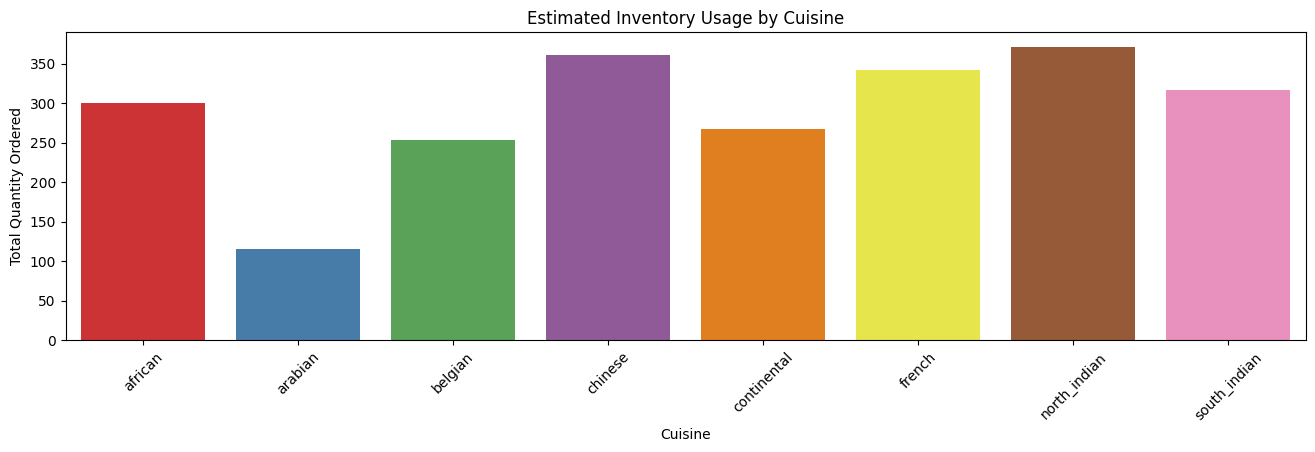

In [24]:
# Group by cuisine or dish and sum quantity
inventory_usage = df.groupby('cuisine')['quantity_of_items'].sum().sort_values(ascending=False)

# Visualize
plt.figure(figsize=(16, 4))
sns.barplot(x=inventory_usage.index, y=inventory_usage.values, palette='Set1')
plt.title("Estimated Inventory Usage by Cuisine")
plt.xlabel("Cuisine")
plt.ylabel("Total Quantity Ordered")
plt.xticks(rotation=45)
plt.show()


- If quantity of items is directly proportional to inventory usage then:
    - High order frequency + high quantity = high inventory usage.
    - We can use quantity of items per cuisine/dish as a strong proxy for analyzing inventory impact.
- Thus with this we can conclude that
    - __north_indian__ food requires the most inventory usage as it is most ordered cuisine